<a href="https://colab.research.google.com/github/LorettaLetter/geralzao/blob/main/Resolution_exercise_3.C5_Hibbeler_7th_edition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import colorsys

n	Phi Aproximado	Phi Exato	Erro (%)
4	1.403023e-10	1.450625e-10	3.28145
8	1.438255e-10	1.450625e-10	0.85271
20	1.448628e-10	1.450625e-10	0.13767
100	1.450551e-10	1.450625e-10	0.00512
200	1.450611e-10	1.450625e-10	0.00097


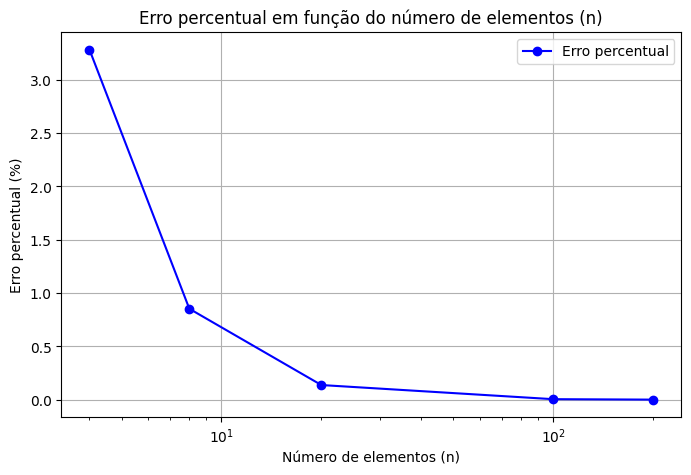

In [ ]:
# Definição dos parâmetros
T = 100    # Torque aplicado (exemplo)
L = 10   # Comprimento do eixo (altura do cone)
G = 80e9   # Módulo de cisalhamento (exemplo)
c = 2.00   # raio base superior
n_values = [4, 8, 20, 100, 200]  # Diferentes valores de n

# Cálculo analítico obtido a partir do problema 3.158
phi_exact = (T * L / (G * c**4)) * 0.18568
array_erros = []
# Loop para calcular aproximações e erro percentual
print("n\tPhi Aproximado\tPhi Exato\tErro (%)") # \t nos da um espaço entre as seções
for n in n_values:
    i = np.arange(1, n + 1) # note que i é uma matriz de 1 a n
    r_i = ((n + i - 0.5) * c) / n  # Cálculo dos raios - note que r_1 é uma matriz com todos os r possiveis já que i é uma matriz de 0 a n
    J_i = (np.pi / 2) * r_i**4      # Momento de inércia - o mesmo ocorre para J_i
    delta_phi = (T * (L / n)) / (G * J_i)  # Torção incremental - aqui, estamos calculando todos os delta_phi possiveis
    phi_aprox = np.sum(delta_phi)  # Soma total de todos os delta_phis
    erro_percentual = (np.sqrt((phi_aprox - phi_exact)**2)/ phi_exact) * 100  # Erro percentual
    array_erros.append(erro_percentual)
    print(f"{n}\t{phi_aprox:.6e}\t{phi_exact:.6e}\t{erro_percentual:.5f}")


# Gráfico do erro percentual em função de n
plt.figure(figsize=(8, 5))
plt.plot(n_values, array_erros, marker='o', linestyle='-', color='b', label='Erro percentual')
plt.xscale('log')
plt.xlabel('Número de elementos (n)')
plt.ylabel('Erro percentual (%)')
plt.title('Erro percentual em função do número de elementos (n)')
plt.legend()
plt.grid()
plt.show()

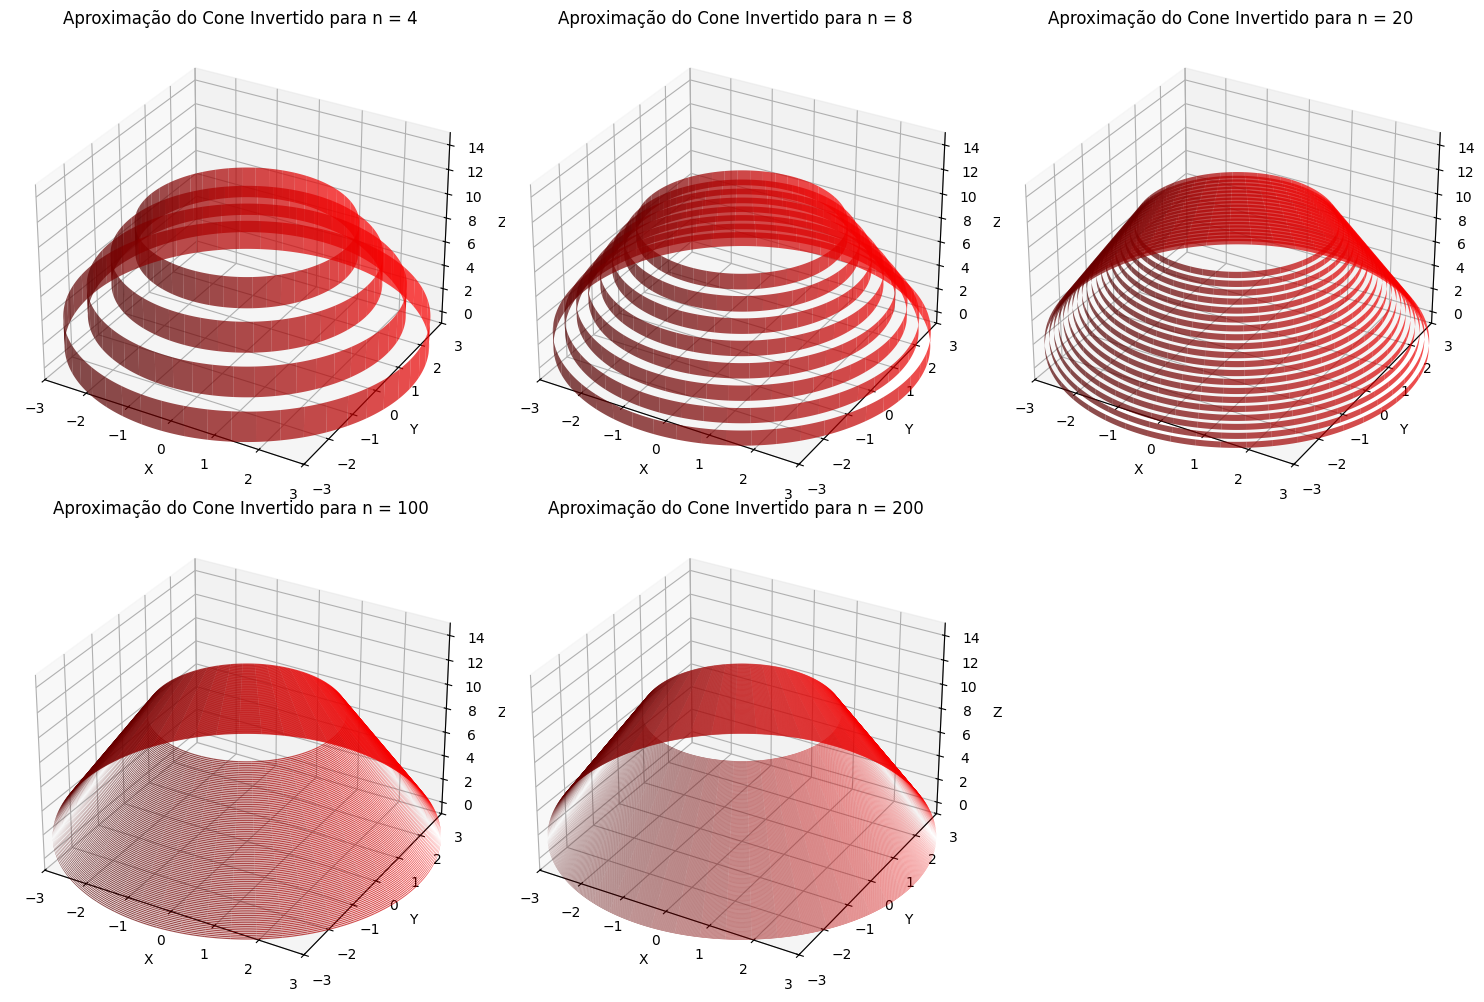

In [ ]:
# Função para plotar a aproximação 3D do cone invertido

def plot_cone_approximation(n, ax):
    h = L / n  # Altura de cada cilindro
    theta = np.linspace(0, 2*np.pi, 1000) # aqui, estamos divindo 2pi em 1000 faces retangulares para cada faixa
    X_circ = np.cos(theta) # coordenadas esfericas de r=1
    Y_circ = np.sin(theta) # coordenadas esfericas de r=1

    for i in range(n):
        ri = ((n + i + 1 - 0.5) * c) / n  # Raio do cilindro no nível i - note que a partir dessa forma, obtemos o cone real que esta sendo analisado pelo exercicio (um cone meio gordo)
        z = np.array([L - i*h, L - (i+1)*h])  # Invertendo a ordem das alturas**
        X = ri * np.outer(np.ones(2), X_circ)
        Y = ri * np.outer(np.ones(2), Y_circ)
        Z = np.outer(z, np.ones(len(theta)))

        ax.plot_surface(X, Y, Z, color='r', alpha=0.7, edgecolor='none') # alpha representa a saturacao

    # Configuração do gráfico
    ax.set_xlim([-1.5*c, 1.5*c])
    ax.set_ylim([-1.5*c, 1.5*c])
    ax.set_zlim([-1, 1.5*L])
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title(f"Aproximação do Cone Invertido para n = {n}")
    ax.view_init(elev=30)  # Ajusta a perspectiva

# Criar gráficos 3D para diferentes valores de n
fig = plt.figure(figsize=(15, 10))
for i, n in enumerate(n_values):  # plotca cada conjunto de aneis circulares pra cada n definido
    ax = fig.add_subplot(2, 3, i+1, projection='3d')
    plot_cone_approximation(n, ax)

plt.tight_layout()
plt.show()